**Set Environment**

In [1]:
suppressMessages(suppressWarnings(source("config.R")))

You are on Duke Server: DCC
BASE DIRECTORY:     /work/kk319 
WORK DIRECTORY:     /work/kk319/out/CombEffect_STARR 
LOG  DIRECTORY:     /work/kk319/out/CombEffect_STARR/log 
PATH OF SOURCE:     /work/kk319/source 
PATH OF EXECUTABLE: /work/kk319/exe 
PATH OF ANNOTATION: /work/kk319/annotation 


In [2]:
fdiry = file.path(FD_WRK, "annotation_fragment")
motif = "NR_20"
fname = "target_PER1.bed"
fglob = file.path(fdiry, "*", motif, fname)
Sys.glob(fglob)

[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/Input/NR_20/target_PER1.bed"    
 [2] "/work/kk319/out/CombEffect_STARR/annotation_fragment/Input1/NR_20/target_PER1.bed"   
 [3] "/work/kk319/out/CombEffect_STARR/annotation_fragment/Input2/NR_20/target_PER1.bed"   
 [4] "/work/kk319/out/CombEffect_STARR/annotation_fragment/Input3/NR_20/target_PER1.bed"   
 [5] "/work/kk319/out/CombEffect_STARR/annotation_fragment/Input4/NR_20/target_PER1.bed"   
 [6] "/work/kk319/out/CombEffect_STARR/annotation_fragment/Input5/NR_20/target_PER1.bed"   
 [7] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX2_DMSO/NR_20/target_PER1.bed"
 [8] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX2_Dex/NR_20/target_PER1.bed" 
 [9] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX3_DMSO/NR_20/target_PER1.bed"
[10] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX3_Dex/NR_20/target_PER1.bed" 
[11] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX4_DMSO/NR_20/target_PER1.bed"
[12] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX4_Dex/NR_20/target_PER1.bed" 
[13] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX5_DMSO/NR_20/target_PER1.bed"
[14] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX5_Dex/NR_20/target_PER1.bed" 
[15] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX_DMSO/NR_20/target_PER1.bed" 
[16] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX_Dex/NR_20/target_PER1.bed"

## Import

In [3]:
get_sample = function(idn_sample){
    idn = idn_sample
    idn = str_replace(
        string = idn, 
        pattern = "Input[0-9]", 
        replacement = "Input")
    idn = str_replace(
        string = idn, 
        pattern = "TFX[0-9]_", 
        replacement="TFX_")
    return(idn)
}

In [4]:
fdiry = file.path(FD_WRK, "source")
fname = "library_size.txt"
fpath = file.path(fdiry, fname)

ctypes = c(col_integer(), col_character())
cnames = c("Size", "Fpath")
dat_lib = read_tsv(fpath, col_types=ctypes, col_names = cnames)
dat_lib = dat_lib %>% 
    mutate(Sample = tools::file_path_sans_ext(basename(Fpath))) %>%
    mutate(Group = get_sample(Sample))
dat_lib = dat_lib %>% dplyr::select(Size, Sample, Group)
head(dat_lib, 10)

Size,Sample,Group
18666630,Input1,Input
20167924,Input2,Input
23280988,Input3,Input
19003938,Input4,Input
15325016,Input5,Input
48376253,TFX2_AZD2906,TFX_AZD2906
52542517,TFX2_AZD9567,TFX_AZD9567
43646484,TFX2_CORT108297,TFX_CORT108297
41732268,TFX2_CpdA,TFX_CpdA
43844606,TFX2_DMSO,TFX_DMSO


## Import

In [5]:
Samples=c(
    paste0("Input", 1:5),
    paste0("TFX",   2:5, "_DMSO"),
    paste0("TFX",   2:5, "_Dex")
)

In [6]:
fpaths = list.dirs("/work/kk319/out/CombEffect_STARR/annotation_fragment/Input1")
motifs = basename(fpaths)
motifs = grep(pattern = paste(c(Samples, "ipynb"), collapse="|"),
     x       = motifs, 
     invert  = TRUE,
     value   = TRUE)

In [7]:
ctypes = c(col_character(), col_integer(), col_integer(), col_integer(),
           col_character(), col_integer(), col_integer(),
           col_character(), col_double(),  col_integer())
cnames = c("Chrom_Frag", "Start_Frag", "End_Frag", "Count_Frag",
           "Chrom_MTF",  "Start_MTF",  "End_MTF",
           "Motif", "Score", "Overlap")
fname = "target_PER1.bed"

lst_dat = lapply(motifs, function(motif){
    lst = lapply(Samples, function(sam){
        ### get file
        fdiry = file.path(FD_WRK, "annotation_fragment", sam, motif)
        fpath = file.path(fdiry, fname)
        print(fpath)
        
        ### import data
        dat = read_tsv(fpath, col_types=ctypes, col_names=cnames)
        dat$Sample = sam
        return(dat)
    })
    print("++++++++++++++++++++++++++++++++++++++++++++++++++")
    dat = bind_rows(lst)
    return(dat)
})
names(lst_dat) = motifs

fun = function(dat){nrow(dat) != 0}
lst_dat = Filter(fun, lst_dat)

[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/Input1/AHR/target_PER1.bed"
[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/Input2/AHR/target_PER1.bed"
[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/Input3/AHR/target_PER1.bed"
[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/Input4/AHR/target_PER1.bed"
[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/Input5/AHR/target_PER1.bed"
[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX2_DMSO/AHR/target_PER1.bed"
[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX3_DMSO/AHR/target_PER1.bed"
[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX4_DMSO/AHR/target_PER1.bed"
[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX5_DMSO/AHR/target_PER1.bed"
[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX2_Dex/AHR/target_PER1.bed"
[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX3_Dex/AHR/target_PER1.bed"
[1] "/work/kk319/out/CombEffect_STARR/

Warning message:
“`data_frame()` was deprecated in tibble 1.1.0.
Please use `tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”

[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX4_DMSO/AIRE/target_PER1.bed"
[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX5_DMSO/AIRE/target_PER1.bed"
[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX2_Dex/AIRE/target_PER1.bed"
[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX3_Dex/AIRE/target_PER1.bed"
[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX4_Dex/AIRE/target_PER1.bed"
[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/TFX5_Dex/AIRE/target_PER1.bed"
[1] "++++++++++++++++++++++++++++++++++++++++++++++++++"
[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/Input1/AP1_1/target_PER1.bed"
[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/Input2/AP1_1/target_PER1.bed"
[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/Input3/AP1_1/target_PER1.bed"
[1] "/work/kk319/out/CombEffect_STARR/annotation_fragment/Input4/AP1_1/target_PER1.bed"
[1] "/work/kk319/out/CombEffect_STARR/annotation_fragme

In [8]:
print(names(lst_dat))

  [1] "AHR"           "AIRE"          "AP1_1"         "AP1_2"        
  [5] "BATF"          "BCL6_1"        "BCL6_2"        "CCAAT_CEBP"   
  [9] "CENBP"         "CPEB1"         "CREB_ATF_1"    "CREB_ATF_2"   
 [13] "CREB_ATF_3"    "CREB3_XBP1"    "CTCF"          "CUX_1"        
 [17] "CUX_2"         "DDIT3+CEBPA"   "E2F_1"         "E2F_2"        
 [21] "E2F_3"         "E2F_4"         "EBF1"          "Ebox_CACCTG"  
 [25] "Ebox_CACGTG_1" "Ebox_CACGTG_2" "Ebox_CAGATGG"  "Ebox_CAGCTG"  
 [29] "Ebox_CATATG"   "EGR"           "ETS_1"         "ETS_2"        
 [33] "EVI1_MECOM"    "EWSR1_FLI1"    "FEZF1"         "FOX_1"        
 [37] "FOX_2"         "FOX_3"         "FOX_4"         "FOX_5"        
 [41] "FOX_7"         "FOX_9"         "GATA"          "GC-tract"     
 [45] "GCM"           "GFI"           "GLI"           "GLIS"         
 [49] "GMEB2_1"       "GMEB2_2"       "GRHL"          "HAND1"        
 [53] "HD_10"         "HD_12"         "HD_13"         "HD_14"        
 [57] "HD_15"       

## Preprocess counts

In [9]:
lst_cnt = lapply(lst_dat, function(dat){
    ### get fragments
    tmp = dat %>% 
        dplyr::select(Chrom_Frag, Start_Frag, End_Frag, Count_Frag, Sample) %>%
        distinct()
    
    ### count
    tmp = tmp %>% group_by(Sample) %>% summarise(Value = sum(Count_Frag))
    
    ### normalized with library size
    tmp = tmp %>% left_join(dat_lib, by="Sample")
    tmp = tmp %>%
        mutate(Norm_Value    = Value / Size) %>% 
        mutate(Lognorm_Value = log10(Value) - log10(Size))
    return(tmp)
})

In [10]:
dat = lst_cnt[[1]]
head(dat, 3)

Sample,Value,Size,Group,Norm_Value,Lognorm_Value
Input1,44,18666630,Input,2.357147e-06,-5.627613
Input2,50,20167924,Input,2.479184e-06,-5.605691
Input3,81,23280988,Input,3.479234e-06,-5.458516


## Linear model

In [12]:
lst_fit = lapply(lst_cnt, function(dat){
    ###
    X = model.matrix(~ Group, dat)
    X[,"GroupTFX_DMSO"] = X[,"GroupTFX_DMSO"] + X[,"GroupTFX_Dex"]
    y = dat$Norm_Value
    
    ###
    fit = lm(y ~ X + 0)
    return(fit)
})

In [13]:
fdiry = file.path(FD_WRK, "model_linear")
fname = "fit_marginal_target_PER1.rds"
fpath = file.path(fdiry, fname)
saveRDS(lst_fit, fpath)

## Summarize

In [14]:
lst_res = lapply(names(lst_fit), function(mtf){
    fit = lst_fit[[mtf]]
    res = summary(fit)
    dat = as.data.frame(coef(res))
    dat = rownames_to_column(dat, var="X")
    dat$Motif = mtf
    return(dat)
})

In [15]:
fun = function(motifs){
    res = sapply(motifs, function(motif){
        if (motif == "NR_20"){ return("red") }
        if (motif == "AP1_1"){ return("blue") }
        return("grey50")
    })
    return(res)
}

In [16]:
dat = bind_rows(lst_res)
dat = dat %>% dplyr::filter(str_detect(X, "Intercept", negate = TRUE))
dat$Color = fun(dat$Motif)

In [17]:
unique(dat$X)

[1] "XGroupTFX_Dex"  "XGroupTFX_DMSO"

In [18]:
head(dat)

X,Estimate,Std. Error,t value,Pr(>|t|),Motif,Color
XGroupTFX_Dex,6.558705e-06,9.088586e-07,7.2164191,2.869911e-05,AHR,grey50
XGroupTFX_DMSO,8.142264e-06,8.622190e-07,9.4433833,2.679981e-06,AHR,grey50
XGroupTFX_Dex,-9.053152e-08,1.055858e-07,-0.8574216,4.134608e-01,AIRE,grey50
XGroupTFX_DMSO,-3.796510e-07,1.009593e-07,-3.7604357,4.481997e-03,AIRE,grey50
XGroupTFX_Dex,1.539979e-05,8.295054e-07,18.5650284,4.438167e-09,AP1_1,blue
XGroupTFX_DMSO,3.923801e-06,7.869379e-07,4.9861632,5.484125e-04,AP1_1,blue


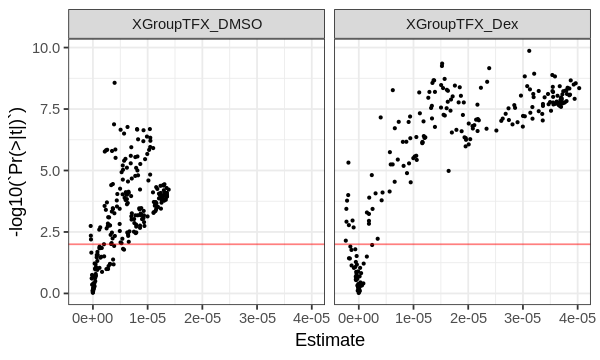

In [19]:
dat$X = factor(dat$X, levels=c("XGroupTFX_DMSO", "XGroupTFX_Dex"))
gpt = ggplot(dat, aes(x=Estimate, y=-log10(`Pr(>|t|)`))) + 
    geom_point(size=0.5) + 
    geom_hline(yintercept = 2, color="red", alpha=0.5) +
    theme_bw() + 
    facet_wrap(~X)

options(repr.plot.height=3, repr.plot.width=5)
print(gpt)

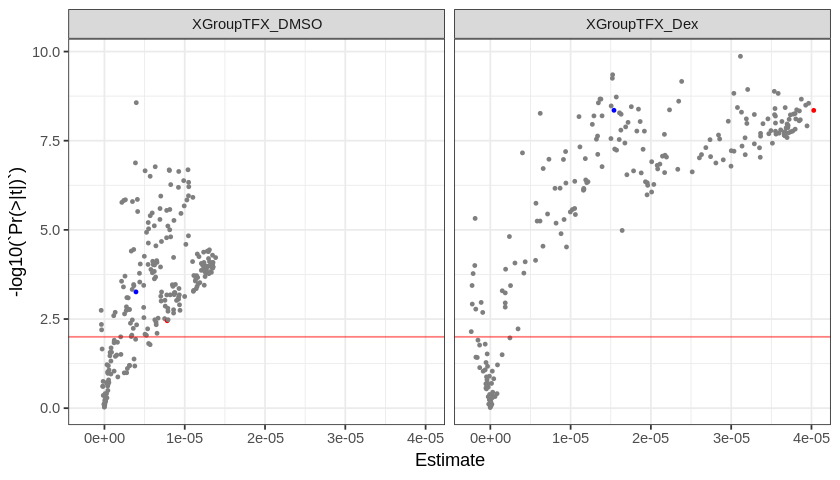

In [24]:
dat$X = factor(dat$X, levels=c("XGroupTFX_DMSO", "XGroupTFX_Dex"))
gpt = ggplot(dat, aes(x=Estimate, y=-log10(`Pr(>|t|)`))) + 
    geom_point(size=0.7, color=dat$Color) + 
    geom_hline(yintercept = 2, color="red", alpha=0.5) +
    theme_bw() + 
    facet_wrap(~X)

options(repr.plot.height=4, repr.plot.width=7)
print(gpt)

In [26]:
head(dat)

X,Estimate,Std. Error,t value,Pr(>|t|),Motif,Color
XGroupTFX_Dex,6.558705e-06,9.088586e-07,7.2164191,2.869911e-05,AHR,grey50
XGroupTFX_DMSO,8.142264e-06,8.622190e-07,9.4433833,2.679981e-06,AHR,grey50
XGroupTFX_Dex,-9.053152e-08,1.055858e-07,-0.8574216,4.134608e-01,AIRE,grey50
XGroupTFX_DMSO,-3.796510e-07,1.009593e-07,-3.7604357,4.481997e-03,AIRE,grey50
XGroupTFX_Dex,1.539979e-05,8.295054e-07,18.5650284,4.438167e-09,AP1_1,blue
XGroupTFX_DMSO,3.923801e-06,7.869379e-07,4.9861632,5.484125e-04,AP1_1,blue


In [28]:
dim(dat)

[1] 480   7

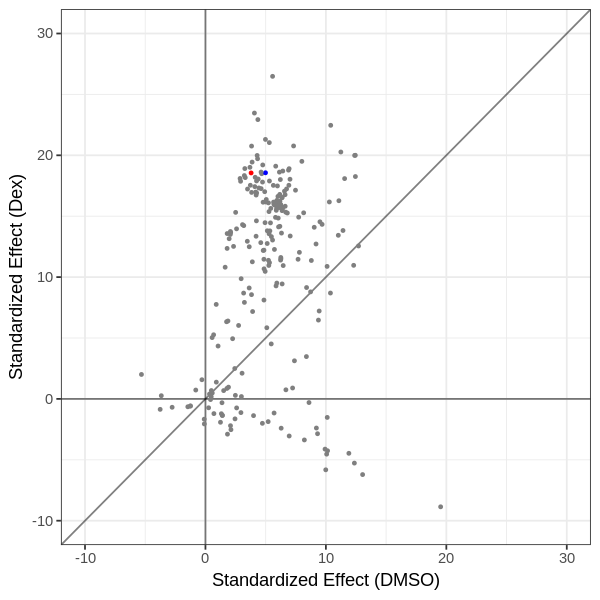

In [39]:
tmp = dat %>% dplyr::select(Motif, X, `t value`, Color) %>% spread(X, `t value`)
gpt = ggplot(tmp, aes(x=XGroupTFX_DMSO, y=XGroupTFX_Dex)) + 
    geom_hline(yintercept = 0, color="black", alpha=0.5) +
    geom_vline(xintercept = 0, color="black", alpha=0.5) +
    geom_abline(slope = 1, intercept = 0, color="black", alpha=0.5) +
    geom_point(size=0.7, color=tmp$Color) +
    theme_bw() +
    xlim(-10, 30) +
    ylim(-10, 30) +
    labs(x="Standardized Effect (DMSO)", y="Standardized Effect (Dex)")

options(repr.plot.height=5, repr.plot.width=5)
print(gpt)

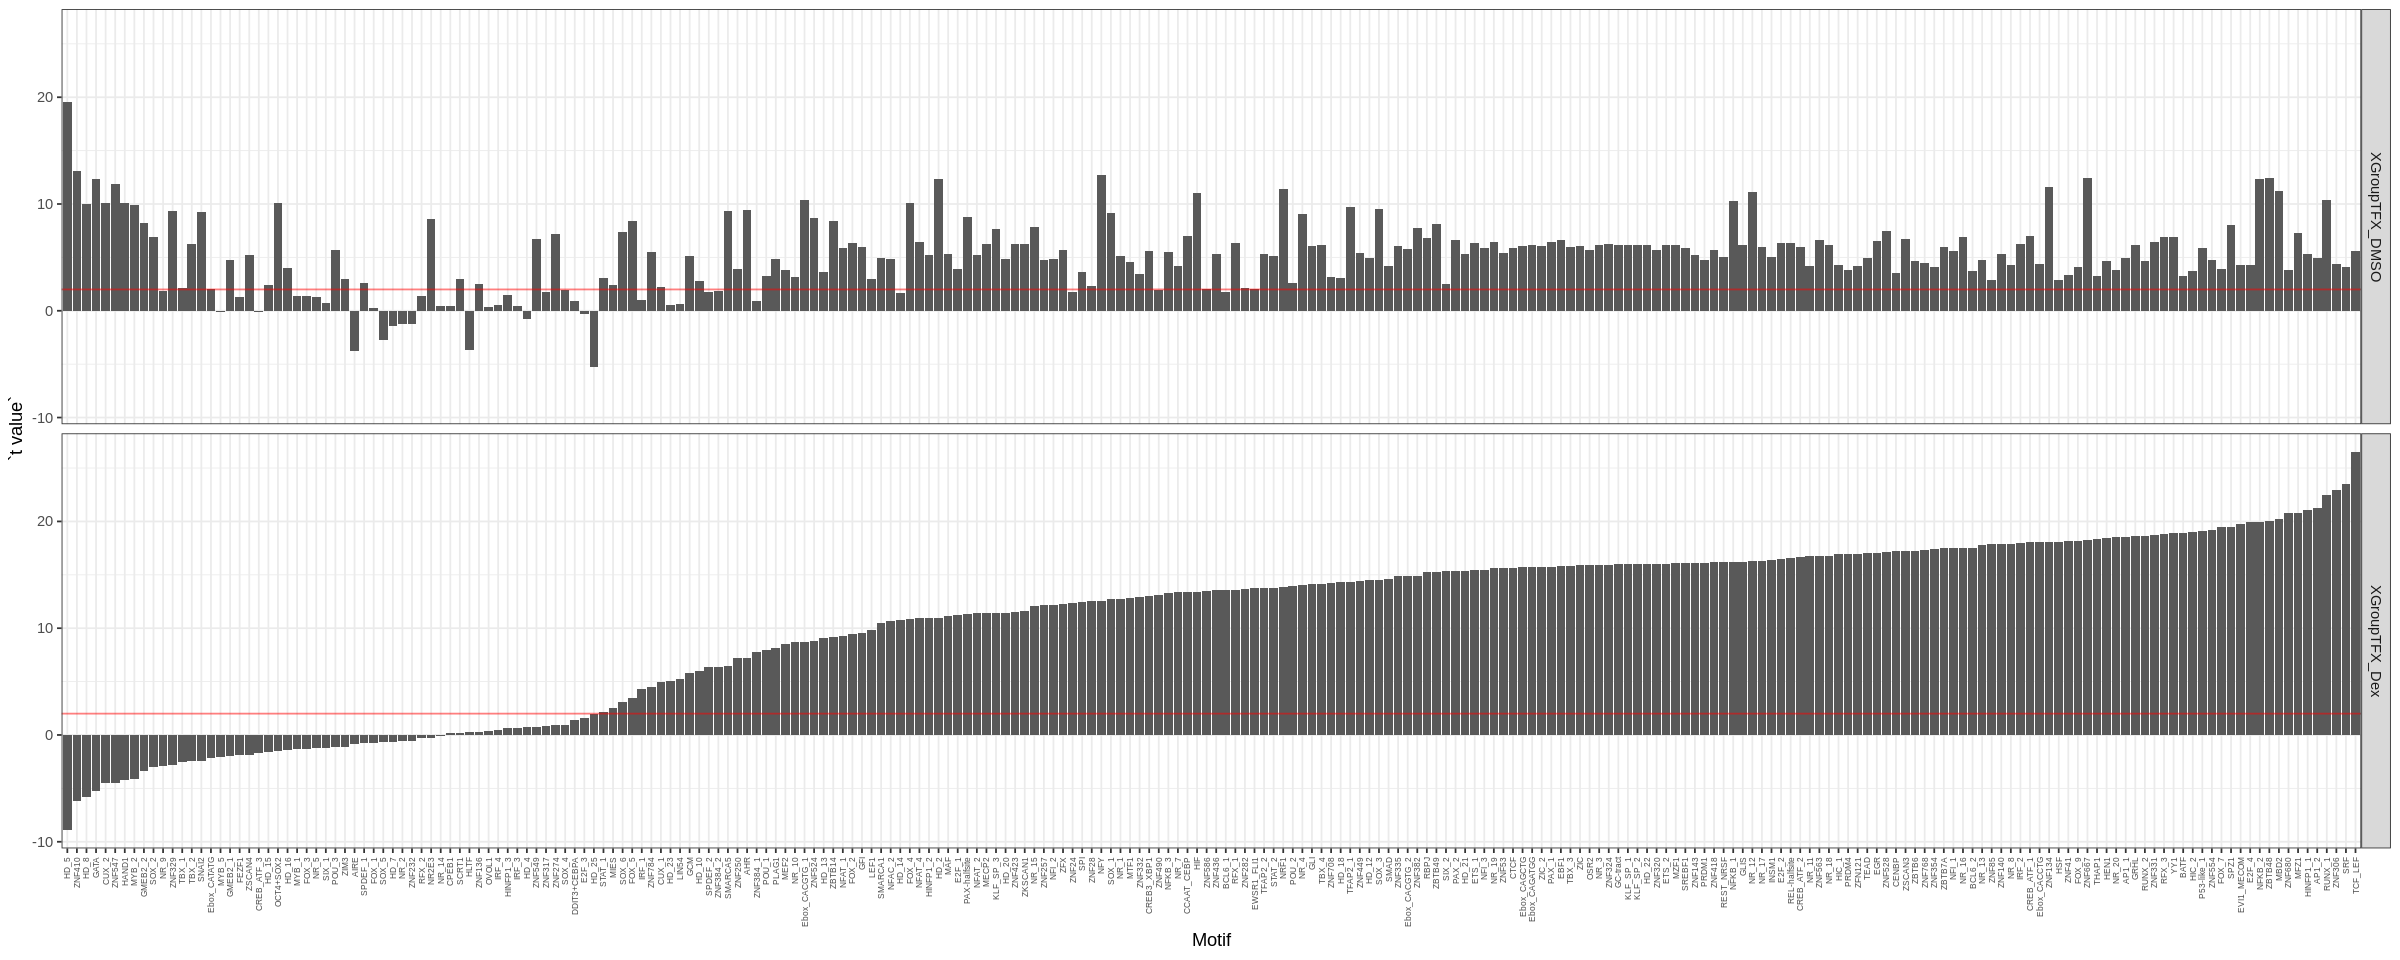

In [25]:
tmp = dat %>% dplyr::filter(str_detect(X, "Dex")) %>% arrange(`t value`)
dat$Motif = factor(dat$Motif, levels=tmp$Motif)
dat$X = factor(dat$X, levels=c("XGroupTFX_DMSO", "XGroupTFX_Dex"))

gpt = ggplot(dat, aes(x=Motif, y=`t value`)) + 
    geom_bar(stat="identity") + 
    geom_hline(yintercept = c2, color="red", alpha=0.5) +
    theme_bw() + 
    theme(axis.text.x = element_text(hjust=1, vjust=0.5, size=5, angle=90)) +
    facet_grid(X~.)

options(repr.plot.height=8, repr.plot.width=20)
print(gpt)

In [177]:
dat

X,Estimate,Std. Error,t value,Pr(>|t|),Motif,Color
XGroupTFX_Dex,309.000000,73.402316,4.2096764,1.800845e-03,AHR,grey50
XGroupTFX_DMSO,292.000000,69.635551,4.1932604,1.848363e-03,AHR,grey50
XGroupTFX_Dex,-2.333333,3.104159,-0.7516797,4.714424e-01,AIRE,grey50
XGroupTFX_DMSO,-4.666667,2.968144,-1.5722510,1.503421e-01,AIRE,grey50
XGroupTFX_Dex,607.750000,69.912642,8.6929915,5.647339e-06,AP1_1,blue
XGroupTFX_DMSO,196.450000,66.324956,2.9619319,1.424098e-02,AP1_1,blue
XGroupTFX_Dex,1244.750000,141.403669,8.8028126,5.047856e-06,AP1_2,grey50
XGroupTFX_DMSO,301.400000,134.147299,2.2467840,4.844337e-02,AP1_2,grey50
XGroupTFX_Dex,1182.500000,135.846936,8.7046498,5.580166e-06,BATF,grey50
XGroupTFX_DMSO,222.200000,128.875719,1.7241417,1.153998e-01,BATF,grey50


In [180]:
cols = c("red" = "red", "blue" = "blue", "grey50" = "grey50")

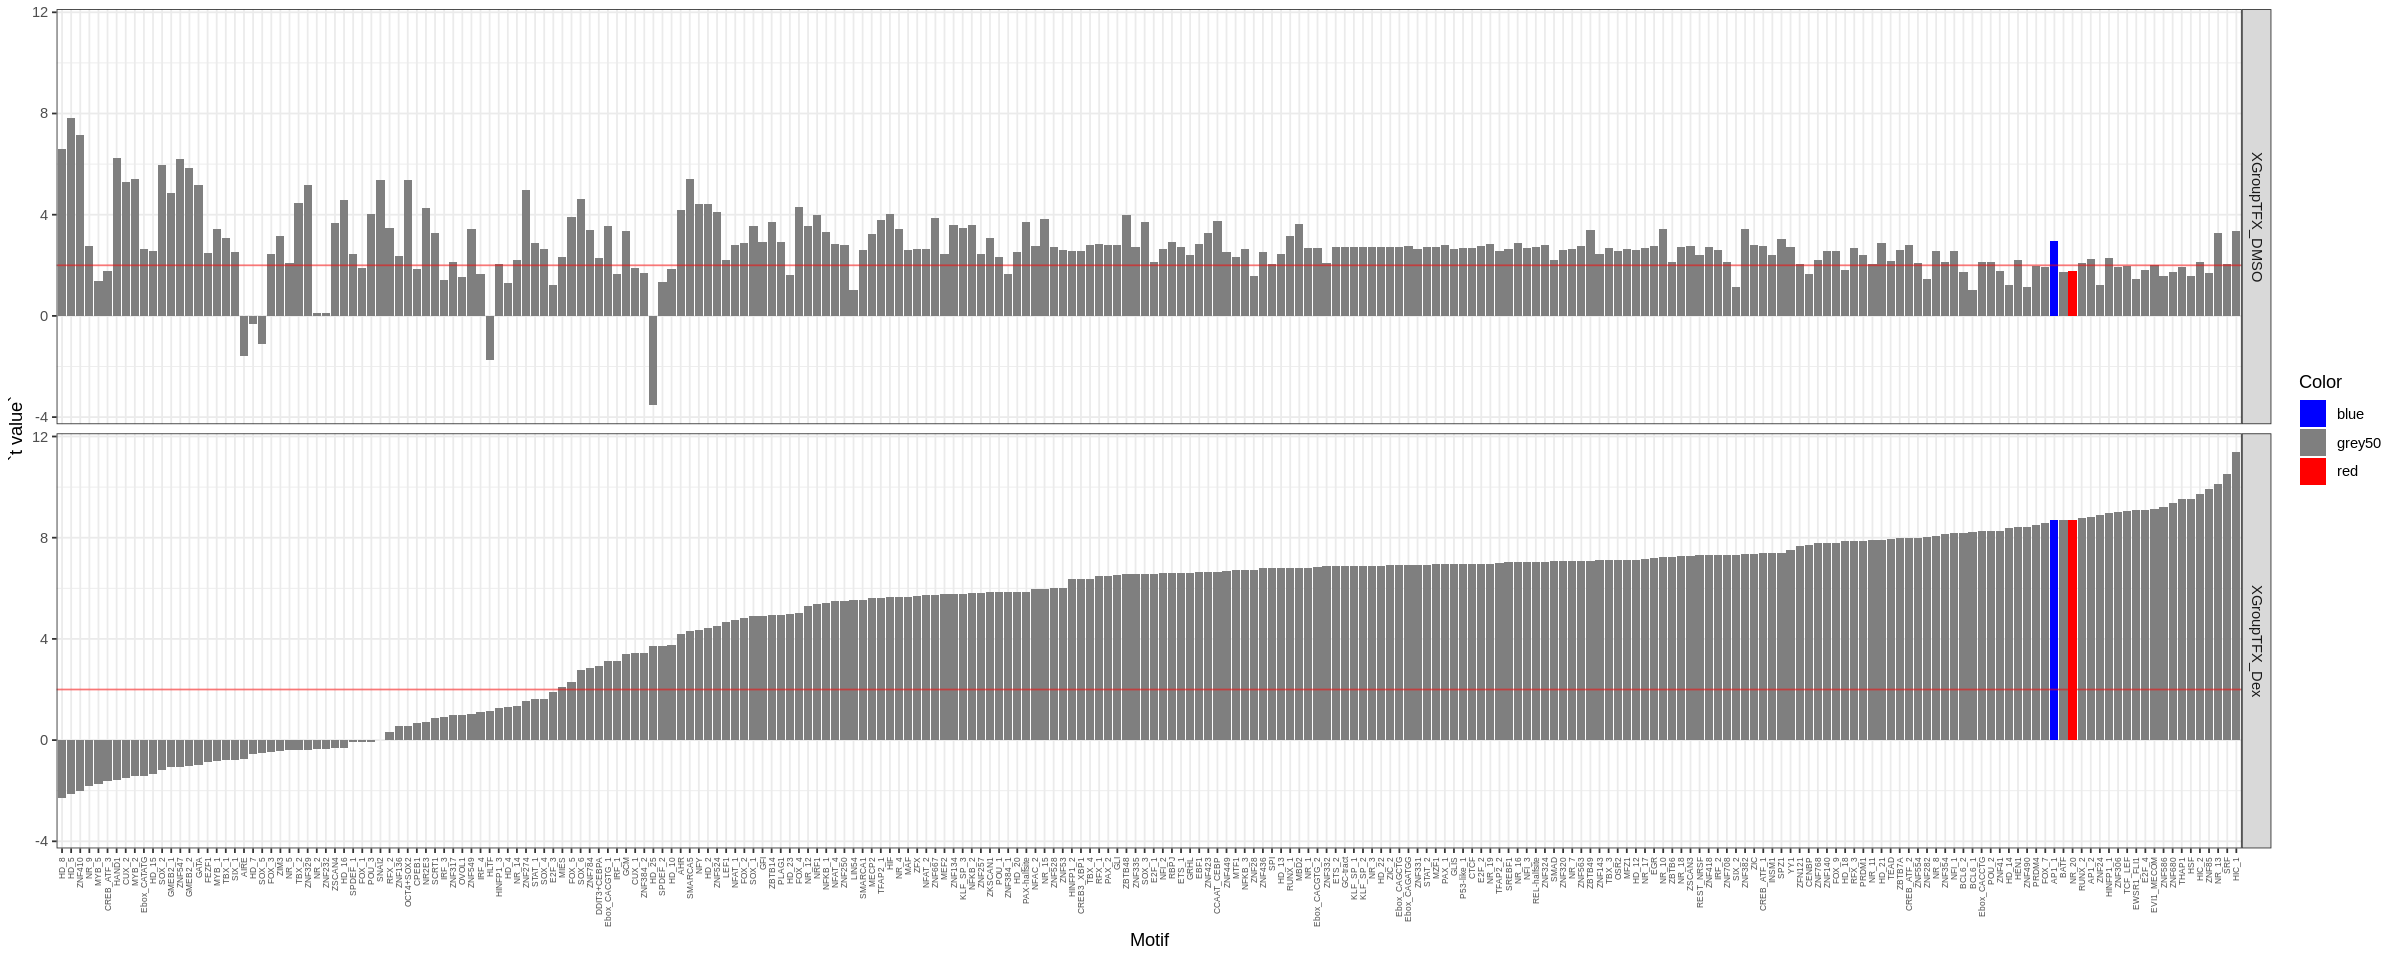

In [181]:
tmp = dat %>% dplyr::filter(str_detect(X, "Dex")) %>% arrange(`t value`)
dat$Motif = factor(dat$Motif, levels=tmp$Motif)
dat$X = factor(dat$X, levels=c("XGroupTFX_DMSO", "XGroupTFX_Dex"))

gpt = ggplot(dat, aes(x=Motif, y=`t value`, fill=Color)) + 
    geom_bar(stat="identity") + 
    geom_hline(yintercept = 2, color="red", alpha=0.5) +
    theme_bw() + 
    theme(axis.text.x = element_text(hjust=1, vjust=0.5, size=5, angle=90)) +
    facet_grid(X~.) +
    scale_fill_manual(values = cols)

options(repr.plot.height=8, repr.plot.width=20)
print(gpt)

In [171]:
tmp = dat %>% dplyr::filter(str_detect(X, "Dex")) %>% arrange(`t value`)
tail(tmp, 20)

,X,Estimate,Std. Error,t value,Pr(>|t|),Motif,Color
221,XGroupTFX_Dex,1182.50,135.84694,8.704650,5.580166e-06,BATF,grey50
222,XGroupTFX_Dex,1557.00,178.86709,8.704788,5.579378e-06,NR_20,red
223,XGroupTFX_Dex,1477.00,168.14498,8.784086,5.144976e-06,RUNX_2,grey50
224,XGroupTFX_Dex,1244.75,141.40367,8.802813,5.047856e-06,AP1_2,grey50
225,XGroupTFX_Dex,673.00,75.66241,8.894774,4.599017e-06,ZNF24,grey50
226,XGroupTFX_Dex,1370.75,152.82941,8.969151,4.267746e-06,HINFP1_1,grey50
227,XGroupTFX_Dex,591.25,65.65880,9.004886,4.117902e-06,ZNF306,grey50
228,XGroupTFX_Dex,1200.25,132.40649,9.064888,3.879032e-06,TCF_LEF,grey50
229,XGroupTFX_Dex,829.75,91.28432,9.089732,3.784584e-06,EWSR1_FLI1,grey50
230,XGroupTFX_Dex,1493.75,164.09122,9.103169,3.734547e-06,E2F_4,grey50


In [ ]:
0.01

In [52]:
mtf = names(lst_fit)[[1]] 
res = lst_fit[[mtf]]
res


Call:
lm(formula = y ~ X + 0)

Residuals:
   Min     1Q Median     3Q    Max 
  -245    -23     -3     28    148 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
X(Intercept)      53.00      46.42   1.142  0.28020   
XGroupTFX_Dex    309.00      73.40   4.210  0.00180 **
XGroupTFX_DMSO   292.00      69.64   4.193  0.00185 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 103.8 on 10 degrees of freedom
Multiple R-squared:  0.9533,	Adjusted R-squared:  0.9393 
F-statistic: 68.08 on 3 and 10 DF,  p-value: 5.878e-07


In [61]:
dat = as.data.frame(coef(res))
dat = rownames_to_column(dat, var="X")
dat$Motif = mtf
dat

X,Estimate,Std. Error,t value,Pr(>|t|),Motif
X(Intercept),53,46.42370,1.141658,0.280196651,AHR
XGroupTFX_Dex,309,73.40232,4.209676,0.001800845,AHR
XGroupTFX_DMSO,292,69.63555,4.193260,0.001848363,AHR


In [ ]:
lapply(lst_fit, )